# FRA_Project(Milestones - 1& 2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_excel('Company_Data2015.xlsx')

# Data Exploration

### Top 5 rows of data

In [3]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


#### To display all the columns

In [5]:
pd.options.display.max_columns= False

In [5]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


* Spacial characters in column names required to be removed.

In [6]:
df.columns=df.columns.str.replace('[','_')
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace(']','')
df.columns=df.columns.str.replace('.','')
df.columns=df.columns.str.replace('(','')
df.columns=df.columns.str.replace(')','')
df.columns=df.columns.str.replace('%','perc')
df.columns=df.columns.str.replace('-','_')
df.columns=df.columns.str.replace('/','_')

In [7]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


### Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_Liabilities_     

* Total 67 columns
* Total 3586 rows
* Data types for all columns are as per expectations
* Null values present in few columns

### Checking duplicate rows

In [9]:
df[df.duplicated()==True]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block


* No duplicate columns are present

### Checking unique valued columns(IDs)

In [10]:
df.Co_Code.nunique()

3586

In [11]:
df.Co_Name.nunique()

3586

* Columns 'Co_Code' and 'Co_Name' are unique valued(IDs) columns. Dropping these for further analysis

In [12]:
df_new=df.copy()

In [7]:
df_new=df.drop(['Co_Code','Co_Name'],axis=1)
df_new.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block
0,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


# 1.1 Outliers Treatment

#### Outliers Check

<AxesSubplot:>

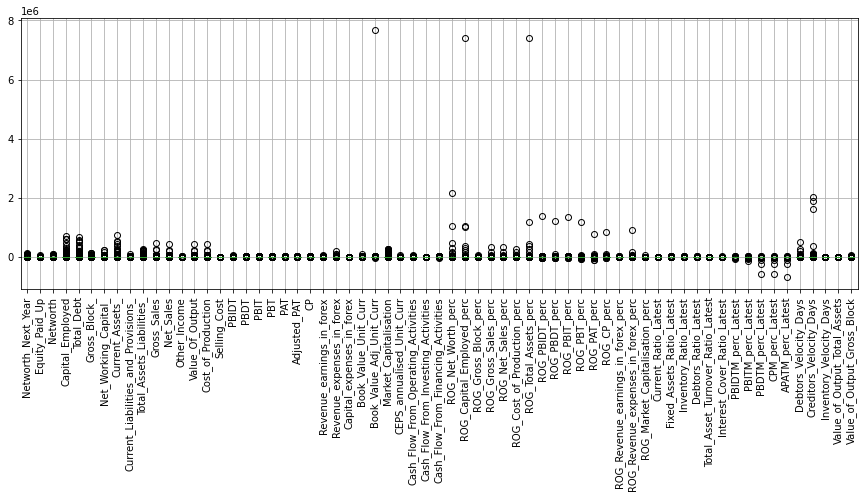

In [14]:
plt.figure(figsize=(15,5))
df_new.boxplot(rot=90)

#### Checking outliers for each column ,seperately 

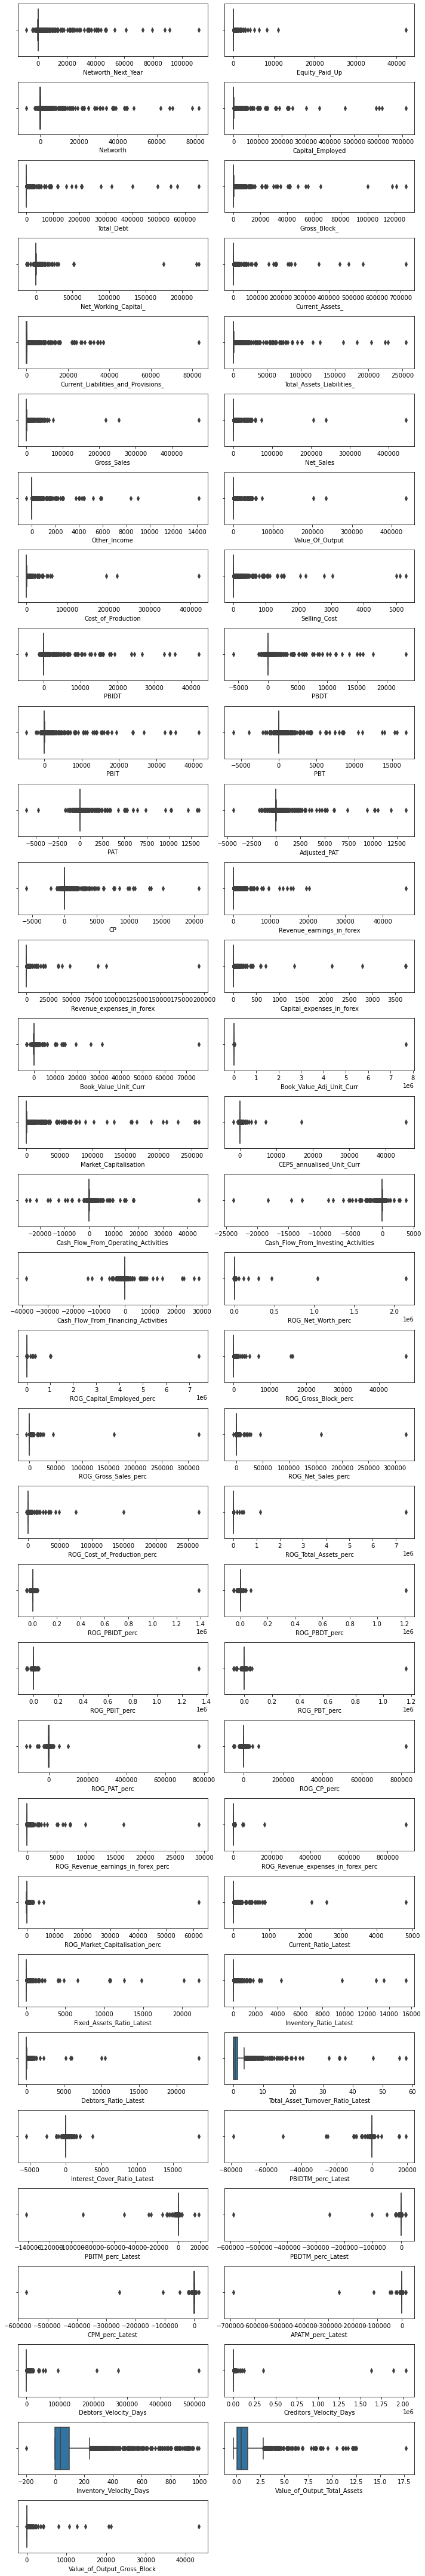

In [15]:
fig=plt.figure(figsize=(10,60))
for i in range(0,len(df_new.columns)):
    ax=fig.add_subplot(33,2,i+1)
    sns.boxplot(df_new[df_new.columns[i]])
    plt.tight_layout();

* There are outliers in all the columns


#### Treating Outliers 

In [8]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


In [9]:
for column in df_new.columns:
    lr,ur=remove_outlier(df[column])
    df_new[column]=np.where(df_new[column]>ur,ur,df_new[column])
    df_new[column]=np.where(df_new[column]<lr,lr,df_new[column])

<AxesSubplot:>

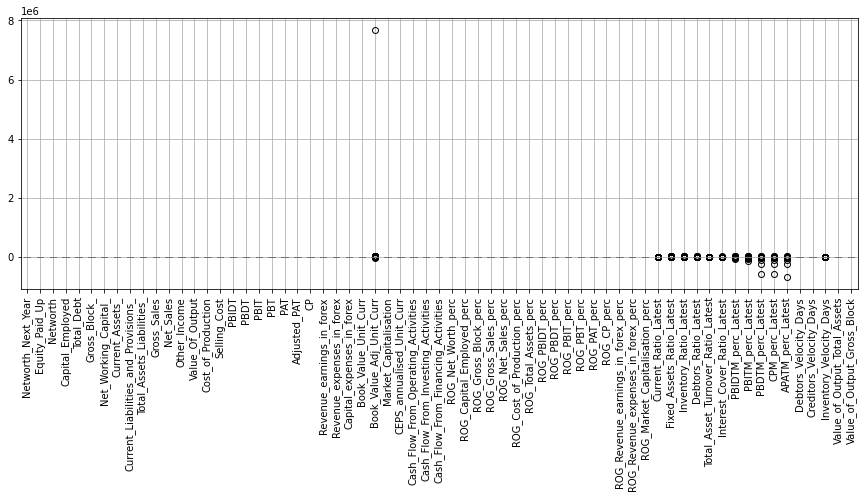

In [18]:
plt.figure(figsize=(15,5))
df_new.boxplot(rot=90)

# 1.2 Missing Value Treatment

### Columns-wise check

In [19]:
df1=pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
df2=df1[df1[0]>0]
df2

,0
Inventory_Velocity_Days,103
Book_Value_Adj_Unit_Curr,4
Interest_Cover_Ratio_Latest,1
PBITM_perc_Latest,1
Fixed_Assets_Ratio_Latest,1
Inventory_Ratio_Latest,1
Debtors_Ratio_Latest,1
Total_Asset_Turnover_Ratio_Latest,1
PBIDTM_perc_Latest,1
PBDTM_perc_Latest,1


* Most Null values present in the column; Inventory_Velocity_Days

### Rows-wise check

In [20]:
df.isnull().sum(axis=1).sort_values(ascending=False)

2825    11
393      1
277      1
598      1
3001     1
        ..
1213     0
1215     0
1216     0
1217     0
3585     0
Length: 3586, dtype: int64

In [21]:
df.loc[[2825],:]

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block
2825,3240,G M Breweries,180.99,11.71,126.2,158.3,32.1,130.8,-7.65,39.86,47.51,205.81,1035.56,516.36,2.36,516.32,263.81,4.11,40.81,34.02,35.25,28.46,18.63,17.55,24.19,0.0,0.0,0.0,107.8,86.24,131.48,20.15,19.79,-12.71,-2.8,10.21,10.62,-4.88,6.07,6.41,8.8,-6.71,-5.12,-8.6,-8.27,-12.81,-13.51,-7.39,0.0,0.0,-11.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,6,23.0,2.98,5.53


* Row 2825 has most number of null values

### Treating missing values

* Since all the columns having missing values have outliers also, so we will replace null values by there repective medians

In [10]:
from sklearn.impute import  SimpleImputer

In [11]:
imputer=SimpleImputer(missing_values=np.nan, strategy='median')

In [12]:
imr=imputer.fit(df_new)
df_new=pd.DataFrame(imr.transform(df_new),columns=df_new.columns)

In [13]:
df_new.isnull().sum().sum()

0

In [15]:
df_new1=df_new.copy()

# 1.3 Transform Target variable into 0 and 1
Dependent variable - We need to create a default variable that should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.

In [16]:
df_new['Default']=np.where((df_new['Networth_Next_Year']>0),0,1)

In [17]:
df_final=df_new.drop(['Networth_Next_Year'],axis=1)

In [18]:
df_final.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Capital_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Revenue_earnings_in_forex_perc,ROG_Revenue_expenses_in_forex_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block,Default
0,43.16875,-166.215,-320.90125,180.83,328.8825,-89.40625,40.50000,163.02625,109.6000,0.00000,0.00,7.6000,-0.070,137.670,0.00000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,0.00000,0.0,-87.595,-167.58,0.00000,-13.15875,-19.74,1.46000,9.915,-15.3100,-20.76000,-9.75,0.00000,0.000,1.38,-25.75,5.23000,-19.29000,4.430,-19.33000,-19.3300,-19.29000,0.0,0.0,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0.0,0.0,45.0,0.00,0.00,1
1,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,583.94,9.0575,587.475,472.465,9.70625,58.7525,-4.3200,35.53000,-11.28375,-8.46,-8.23875,-4.320,6.35,17.46875,0.0,-15.180,-15.18,278.64375,-0.02000,32.08,-12.97375,9.915,-20.7625,6.30000,3.17,5.92000,5.920,13.16,6.66,5.24000,-108.77000,172.385,-9.85000,-9.8500,-108.77000,0.0,0.0,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29.0,101.0,2.0,0.31,0.24,1
2,43.16875,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,392.13000,392.13,9.0575,301.160,408.510,9.70625,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,17.46875,0.0,94.140,94.14,278.64375,-13.15875,-19.74,-12.97375,9.915,-20.7625,15.66000,-2.07,-52.48125,-52.645,-52.79,-0.78,-130.21875,-155.86625,-153.595,-196.02375,-207.3525,-153.12375,0.0,0.0,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.0,210.5,0.0,-0.03,-0.26,1
3,43.16875,-166.215,555.10875,180.83,328.8825,-89.40625,332.19375,163.02625,760.5175,603.46125,583.94,9.0575,587.475,472.465,3.34000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.89,17.46875,0.0,-39.640,-39.64,194.27000,-13.15875,32.08,7.97625,-15.305,-20.7625,-28.46875,-1.80,8.33000,8.330,16.59,-10.12,-130.21875,-102.72000,-153.595,-80.23000,-70.5700,-88.52000,0.0,0.0,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93.0,63.0,2.0,0.24,1.90,1
4,43.16875,-166.215,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,38.72000,38.72,9.0575,38.720,186.290,1.97000,-35.1875,-19.4175,-25.00125,-11.28375,-8.46,-8.23875,-16.365,0.00,15.62000,0.0,-87.595,-212.89,113.68000,-13.15875,-19.74,7.97625,9.915,-20.7625,-11.76000,0.34,-52.48125,-52.645,-48.80,-5.81,-40.07000,3.28000,-38.720,1.87000,-2.5900,-1.13000,0.0,0.0,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,253.0,210.5,0.0,0.01,0.05,1


# 1.4 Univariate & Bivariate analysis with interpretation. (only those variables which were significant in the model building)

* Most significant variables identified after the model building are;
   * Book_Value_Adj_Unit_Curr
   * Current_Ratio_Latest
   * Debtors_Ratio_Latest
   * Interest_Cover_Ratio_Latest
   * PBDTM_perc_Latest
* So, analysing these 

In [19]:
df_most_significants=df_new[['Book_Value_Adj_Unit_Curr','Current_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest','PBDTM_perc_Latest']]

### Boxplots 

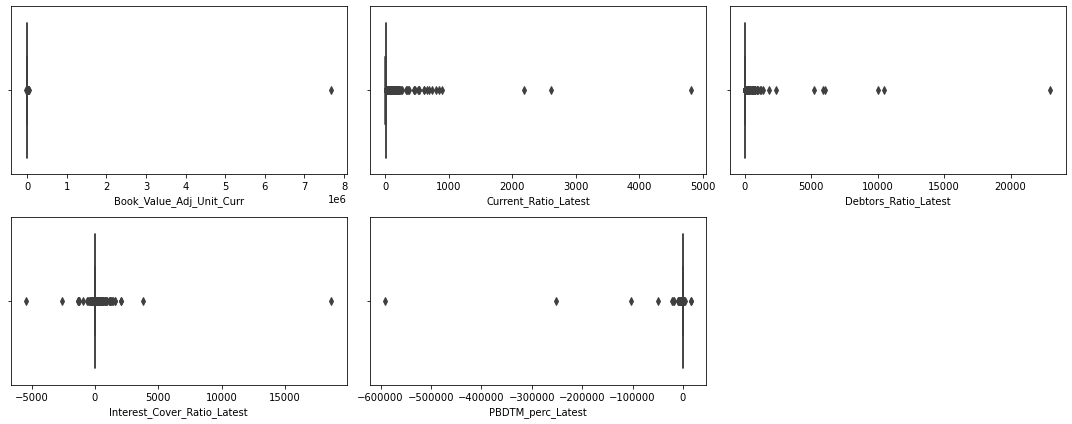

In [31]:
fig=plt.figure(figsize=(15,6))
for i in range(0,len(df_most_significants.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(df_most_significants[df_most_significants.columns[i]])
    plt.tight_layout();

### Distribution plots

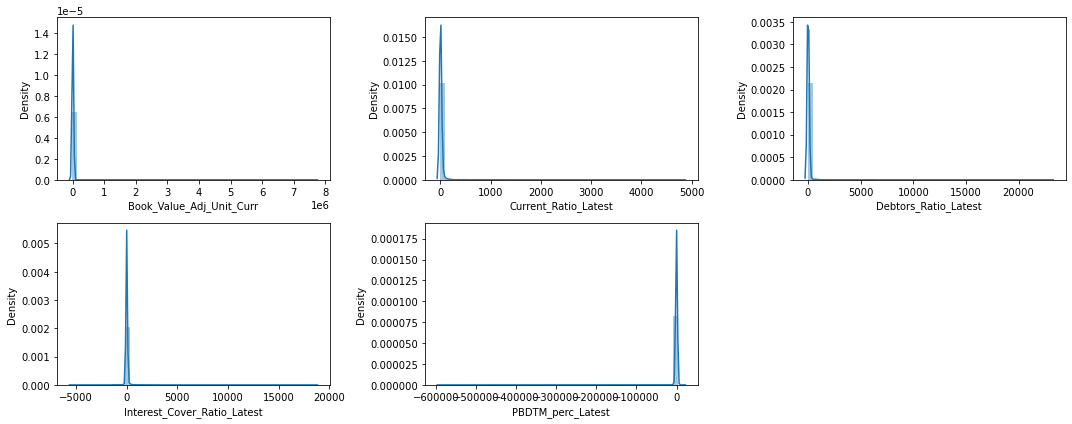

In [32]:
fig=plt.figure(figsize=(15,6))
for i in range(0,len(df_most_significants.columns)):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df_most_significants[df_most_significants.columns[i]])
    plt.tight_layout();

### Countplot for 'Default'

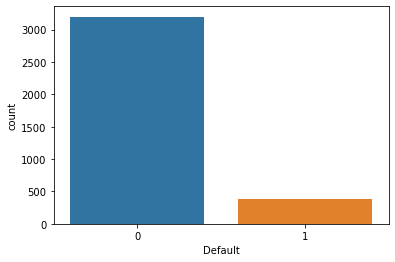

In [33]:
sns.countplot(data=df_final,x='Default');

### Plots most significant variables v/s "Default"

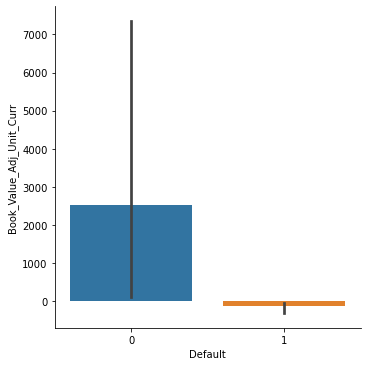

In [34]:
sns.catplot(data=df_final,x='Default',y='Book_Value_Adj_Unit_Curr',kind='bar');

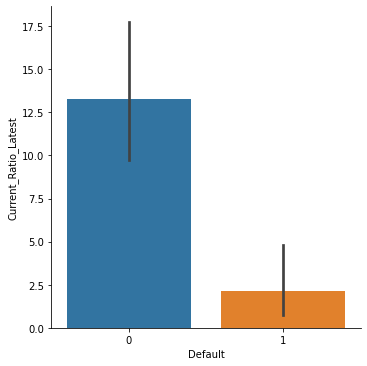

In [35]:
sns.catplot(data=df_final,x='Default',y='Current_Ratio_Latest',kind='bar');

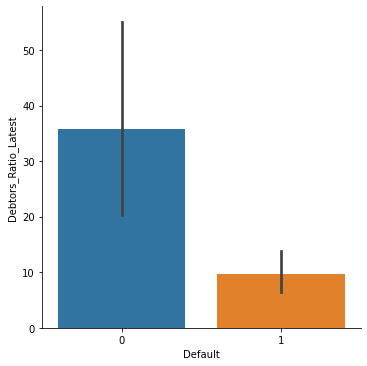

In [36]:
sns.catplot(data=df_final,x='Default',y='Debtors_Ratio_Latest',kind='bar');

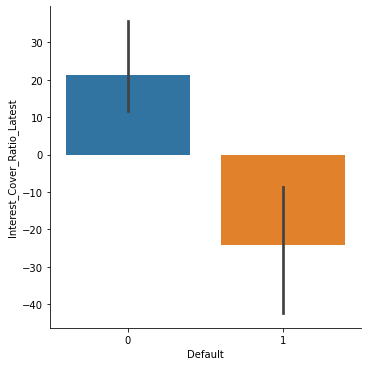

In [37]:
sns.catplot(data=df_final,x='Default',y='Interest_Cover_Ratio_Latest',kind='bar');

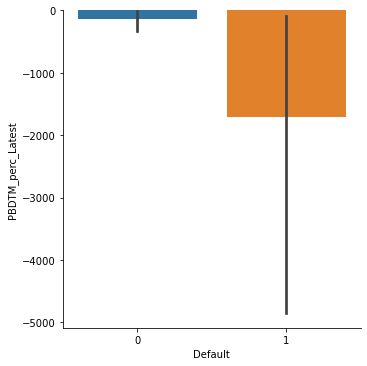

In [38]:
sns.catplot(data=df_final,x='Default',y='PBDTM_perc_Latest',kind='bar');

### Heatmap ( most significant variables and "default")

<AxesSubplot:>

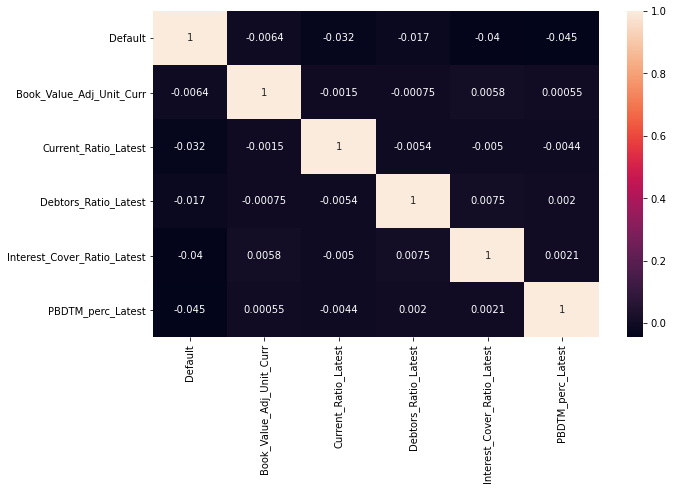

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(df_final[['Default','Book_Value_Adj_Unit_Curr','Current_Ratio_Latest','Debtors_Ratio_Latest','Interest_Cover_Ratio_Latest','PBDTM_perc_Latest']].corr(),annot=True)

### Interpretations from the graphs of most significant variables and 'Default' variable;
* Boxplot- All the variables are having outliers.
* Distribution plots- All the variables are concentrated at value zero.
* For 'Default' v/s ''Book_Value_Adj_Unit_Curr','Current_Ratio_Latest' and 'Debtors_Ratio_Latest', the non-defaulters are high as compared to defaulters.
*  For 'Default' v/s ''Book_Value_Adj_Unit_Curr' and 'PBDTM_perc_Latest', the relation is in negative direction.
* Heatmap- All the variables are showing no correlation among each other and with 'Default".

### Heatmap for complete dataset

<AxesSubplot:>

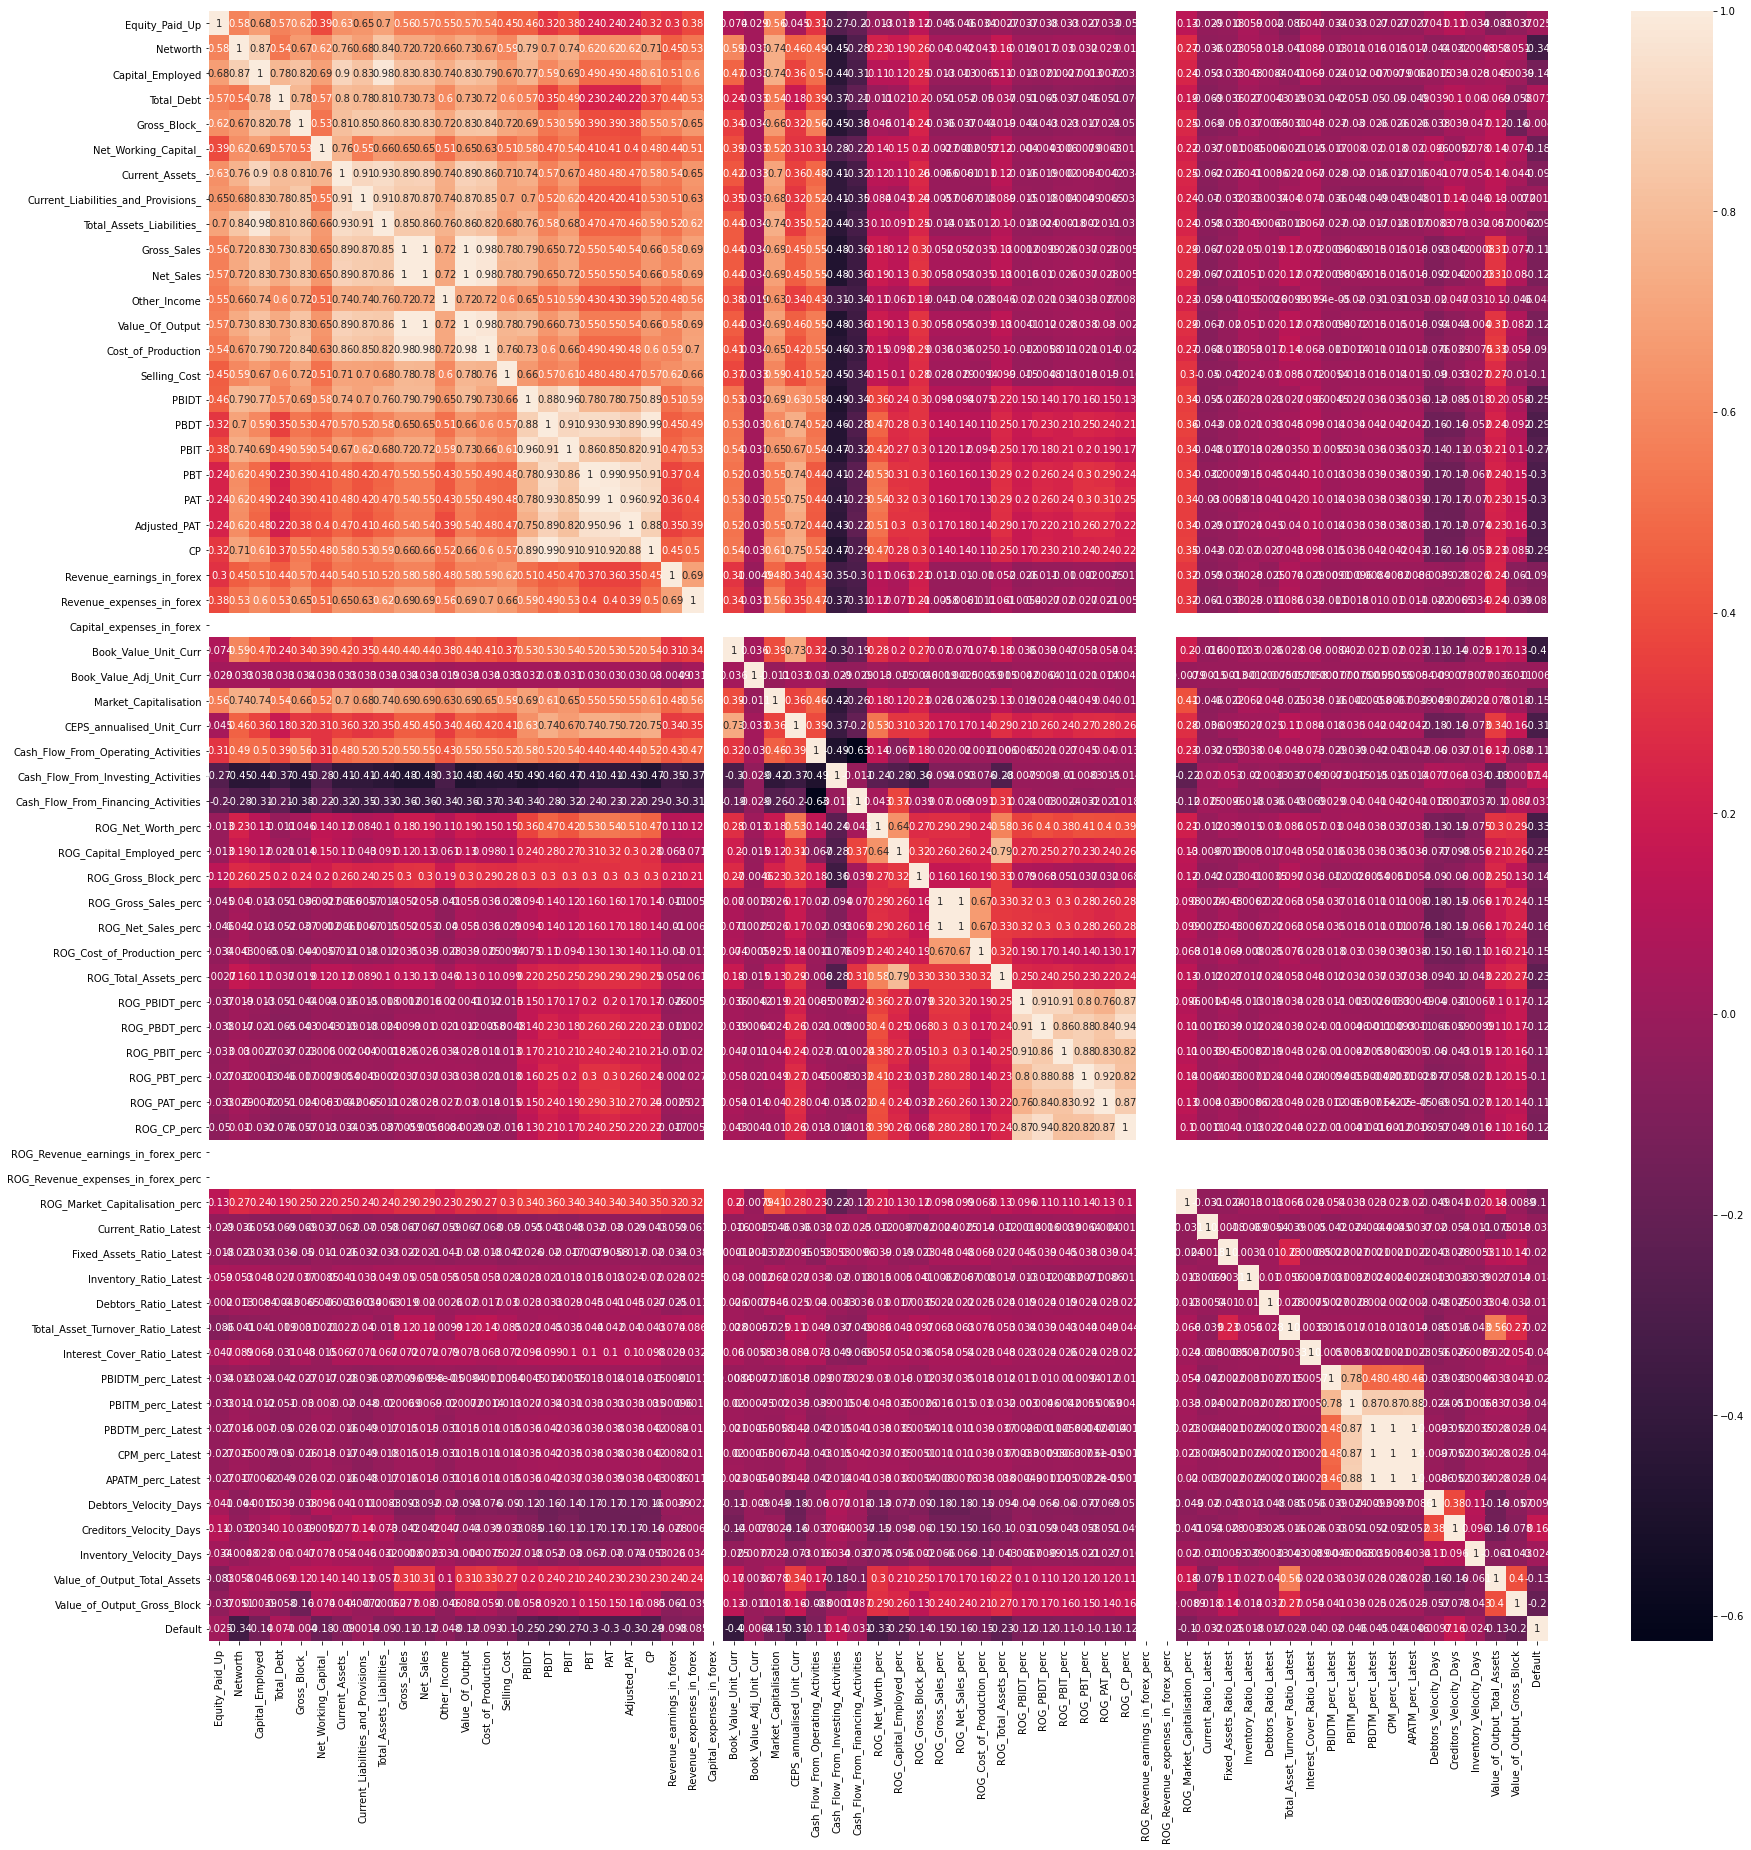

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(df_final.corr(),annot=True)

* There is a perfect correlation between following variables:
  * 'Gross_Sales',  'Net_Sales' and 'Value_Of_Output'
  *  'ROG_Gross_Sales_perc'and 'ROG_Net_Sales_perc'
  *  'PBDTM_perc_Latest','CPM_perc_Latest' and 'APATM_perc_Latest
  So, dropping the columns for further analysis ; 'Net_Sales', 'Value_Of_Output','ROG_Net_Sales_perc','CPM_perc_Latest' and 'APATM_perc_Latest

# 1.5 Train Test Split


* Since, there is a perfect correlation between following variables:
  
  * 'Gross_Sales',  'Net_Sales' and 'Value_Of_Output'
  *  'ROG_Gross_Sales_perc'and 'ROG_Net_Sales_perc'
  *  'PBDTM_perc_Latest','CPM_perc_Latest' and 'APATM_perc_Latest
  * 'ROG_Revenue_expenses_in_forex_perc', 
  * 'ROG_Revenue_earnings_in_forex_perc'
  * 'Capital_expenses_in_forex'
  
 * So, dropping the columns for further analysis ; 'Net_Sales', 'Value_Of_Output','ROG_Net_Sales_perc','CPM_perc_Latest' and 'APATM_perc_Latest

In [20]:
X=df_final.drop(['Default','Capital_expenses_in_forex','ROG_Revenue_earnings_in_forex_perc','ROG_Revenue_expenses_in_forex_perc','Net_Sales', 'Value_Of_Output','ROG_Net_Sales_perc','CPM_perc_Latest','APATM_perc_Latest'],axis=1)
y=df_final['Default']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [34]:
train_dataset=pd.concat([X_train,y_train],axis=1)
test_dataset=pd.concat([X_test,y_test],axis=1)

In [44]:
train_dataset.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Other_Income,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block,Default
662,3.00,2.680,2.72000,0.00,1.0100,1.15000,1.17000,0.01000,2.7300,0.30000,0.0000,0.170,0.01000,0.0200,0.0200,-0.01000,-0.01000,-0.01,0.01000,0.020,0.0,0.00000,8.940,8.94,0.00000,0.07,-0.27,0.30000,0.000,-0.3700,0.37000,-6.48,25.00000,30.77,-5.54,-60.00,-60.00,-133.33,-133.33,-150.00,-50.00,0.00,34.84,0.24,0.00,0.00,0.11,0.00,-32.00,-44.00,-32.00,253.0,0.0,3.0,0.100,0.23,0
1373,2.09,9.740,9.83000,0.00,1.0100,2.35000,2.71000,0.36000,10.1900,0.16000,0.4000,0.300,0.00000,0.1700,0.1700,0.17000,0.17000,0.10,-0.01000,0.100,0.0,0.00000,46.590,46.59,0.00000,0.48,-0.31,0.04000,0.000,1.0400,-0.61000,-1.94,-52.48125,11.11,-1.16,-67.92,-67.92,-66.67,-66.67,-73.68,-75.00,0.00,11.82,0.40,1.48,0.00,0.04,0.00,162.50,157.50,162.50,0.0,0.0,321.0,0.040,0.39,0
3268,25.70,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,603.46125,9.0575,472.465,9.70625,58.7525,32.3625,41.66875,18.64625,13.94,13.49125,27.275,0.0,6.17000,167.225,299.61,278.64375,21.21,-19.74,-12.97375,9.915,21.8300,37.22125,7.22,-30.12000,-31.33,25.49,-17.58,-61.27,-20.14,-77.16,-80.84,-56.89,11.80,0.78,3.64,12.94,0.90,0.36,0.22,8.26,5.91,-18.47,206.0,49.0,27.0,0.370,2.83,0
3246,35.03,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,210.78000,9.0575,98.480,9.70625,42.4300,32.3625,41.66875,18.64625,13.94,13.49125,27.275,18.0,17.46875,163.800,163.80,163.19000,10.09,32.08,-12.97375,-15.305,-20.7625,-25.41000,-10.08,-52.48125,-52.79,-23.02,-78.63,-69.47,-73.01,-56.24,-49.51,-67.59,-58.89,1.25,2.91,0.00,0.00,0.03,183.75,68.29,66.26,67.93,253.0,210.5,0.0,0.010,0.04,0
1456,2.50,8.270,15.14000,6.87,7.5400,8.80000,9.67000,0.88000,16.0200,59.13000,0.1100,53.830,0.00000,2.1100,1.4300,1.72000,1.04000,0.72,0.72000,1.110,0.0,0.00000,33.100,10.07,0.00000,4.44,0.38,-0.32000,-0.290,9.3900,5.87000,5.90,11.90000,12.33,7.09,4.98,4.38,6.17,6.12,5.88,3.74,0.00,1.82,4.66,6.49,744.44,3.01,3.81,5.16,3.81,4.16,0.0,2.0,56.0,2.795,5.92,0


In [45]:
test_dataset.head()

,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets_Liabilities_,Gross_Sales,Other_Income,Cost_of_Production,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_Total_Assets,Value_of_Output_Gross_Block,Default
3163,16.79000,287.405,555.10875,180.83,328.8825,151.52375,332.19375,163.02625,760.5175,603.46125,9.0575,472.465,9.70625,58.7525,32.3625,41.66875,18.64625,13.94,13.49125,27.275,18.00,17.46875,31.26,31.26,245.97,4.66,-19.74,4.68000,9.915,12.59,12.73,14.22,1.23000,-1.83,13.98,-0.15000,-7.94000,2.210,-6.48000,2.2400,-1.42000,48.88,1.11,7.29,3.98,11.15,4.12,1.03,2.33,1.86,0.52,20.0,76.0,43.0,2.01,7.82,0
3133,43.16875,287.405,555.10875,180.83,328.8825,10.08000,157.02000,146.94000,760.5175,603.46125,9.0575,472.465,9.70625,58.7525,32.3625,41.66875,18.64625,13.94,13.49125,27.275,3.97,1.42000,41.64,41.64,0.00,20.19,32.08,-12.97375,-15.305,16.25,-1.55,2.64,11.99000,12.39,-2.36,27.00000,38.05000,43.210,79.63000,60.0100,24.54000,0.00,0.75,2.15,98.40,24.29,2.35,5.27,12.65,7.21,11.29,19.0,2.0,11.0,1.91,1.72,0
937,5.19000,4.390,4.39000,0.00,0.0400,4.39000,4.43000,0.04000,4.4300,0.48000,0.1300,0.540,0.00000,-0.8100,-0.8100,-0.81000,-0.81000,-0.81,-0.81000,-0.810,0.00,0.00000,0.85,0.85,0.78,-0.16,-0.10,0.13000,0.000,-15.74,-15.74,0.00,65.92875,68.67,-15.62,-130.21875,-155.86625,-153.595,-196.02375,-207.3525,-153.12375,-11.36,110.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,35.0,0.00,0.00,0
196,3.81000,-10.210,17.17000,15.16,25.8400,-4.07000,7.94000,12.00000,29.1700,17.72000,1.1200,17.790,0.00000,0.6400,-1.2900,-0.38000,-2.31000,-2.31,-2.31000,-1.290,0.80,0.00000,-26.75,-26.75,0.00,-3.39,1.03,-1.66000,0.570,0.00,0.00,0.00,0.00000,0.00,0.00,0.00000,0.00000,0.000,0.00000,0.0000,0.00000,0.00,0.28,0.76,5.78,89.17,1.13,0.03,3.97,0.33,-5.75,6.0,69.0,52.0,0.00,0.00,1
2852,25.88000,194.120,271.36000,53.59,283.7700,85.21000,122.50000,37.29000,308.6500,287.02000,9.0575,253.290,8.22000,16.6800,5.7900,-11.58000,-11.28375,-8.46,-7.59000,5.230,0.39,0.45000,7.50,7.50,49.95,0.20,25.51,-10.13000,-11.620,-12.35,-9.55,-10.08,11.85000,17.71,-9.39,-55.73000,-76.84000,-153.595,-196.02375,-207.3525,-78.17000,12.88,1.57,1.61,10.76,10.28,1.78,1.65,8.10,3.75,5.82,57.0,35.0,88.0,1.44,1.50,0


# 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

### Model1

In [23]:
f1='Default~Equity_Paid_Up + Networth + Capital_Employed + Total_Debt +Gross_Block_+ Net_Working_Capital_ + Current_Assets_+Current_Liabilities_and_Provisions_+Total_Assets_Liabilities_+Gross_Sales+ Other_Income+Cost_of_Production+ Selling_Cost+ PBIDT+ PBDT+PBIT+ PBT+PAT+Adjusted_PAT+CP+ Revenue_earnings_in_forex+Revenue_expenses_in_forex +Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Market_Capitalisation +CEPS_annualised_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Capital_Employed_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_PBDT_perc+ROG_PBIT_perc+ROG_PBT_perc+ROG_PAT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBIDTM_perc_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_Total_Assets+Value_of_Output_Gross_Block'

In [24]:
model_1=SM.logit(formula=f1,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.115067
         Iterations 21


In [25]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2345
Method:                           MLE   Df Model:                           56
Date:                Wed, 04 May 2022   Pseudo R-squ.:                  0.6507
Time:                        13:49:15   Log-Likelihood:                -276.39
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.658e-179
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.1811      0.254     -0.714      0.475      -0.678       0.316
Equity_Paid_Up                         -0.0284      0.015     -1.935      0.053      -0.057       0.000
Networth                               -0.0009      0.004     -0.228      0.820      -0.009       0.007
Capital_Employed                       -0.0084      0.009     -0.898      0.369      -0.027       0.010
Total_Debt                              0.0151      0.006      2.361      0.018       0.003       0.028
Gross_Block_                            0.0056      0.004      1.335      0.182      -0.003       0.014
Net_Working_Capital_                   -0.0038      0.008     -0.449      0.653      -0.020       0.013
Current_Assets_                         0.0127      0.008      1.548      0.122      -0.003       0.029
Current_Liabilities_and_Provisions_    -0.0008      0.013     -0.059      0.953      -0.027       0.025
Total_Assets_Liabilities_              -0.0002      0.008     -0.024      0.981      -0.016       0.016
Gross_Sales                            -0.0016      0.007     -0.235      0.814      -0.015       0.012
Other_Income                            0.0513      0.067      0.770      0.441      -0.079       0.182
Cost_of_Production                     -0.0014      0.008     -0.178      0.859      -0.017       0.014
Selling_Cost                            0.0331      0.090      0.366      0.714      -0.144       0.210
PBIDT                                  -0.0545      0.032     -1.685      0.092      -0.118       0.009
PBDT                                   -0.0057      0.105     -0.055      0.956      -0.211       0.200
PBIT                                    0.0796      0.046      1.745      0.081      -0.010       0.169
PBT                                    -0.1579      0.087     -1.822      0.068      -0.328       0.012
PAT                                     0.2268      0.127      1.790      0.073      -0.022       0.475
Adjusted_PAT                            0.0480      0.070      0.687      0.492      -0.089       0.185
CP                                     -0.0748      0.123     -0.606      0.544      -0.317       0.167
Revenue_earnings_in_forex               0.0152      0.032      0.472      0.637      -0.048       0.078
Revenue_expenses_in_forex               0.0238      0.036      0.657      0.511      -0.047       0.095
Book_Value_Unit_Curr                   -0.0777      0.055     -1.409      0.159      -0.186       0.030
Book_Value_Adj_Unit_Curr               -0.0333      0.055     -0.601      0.548      -0.142       0.075
Market_Capitalisation                  -0.0035      0.003     -1.093      0.275      -0.010       0.003
CEPS_annualised_Unit_Curr              -0.0920      0.050     -1.851      0.064      -0.190       0.005
Cash_Flow_From_Operating_Activities    -0.0322      0.025     -1.280      0.200      -0.081       0.017
Cash_Flow_From_In

#### Checking the Variance Inflation Factor

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
for i,j in enumerate(train_dataset.columns):
    print(i,j)

0 Equity_Paid_Up
1 Networth
2 Capital_Employed
3 Total_Debt
4 Gross_Block_
5 Net_Working_Capital_
6 Current_Assets_
7 Current_Liabilities_and_Provisions_
8 Total_Assets_Liabilities_
9 Gross_Sales
10 Other_Income
11 Cost_of_Production
12 Selling_Cost
13 PBIDT
14 PBDT
15 PBIT
16 PBT
17 PAT
18 Adjusted_PAT
19 CP
20 Revenue_earnings_in_forex
21 Revenue_expenses_in_forex
22 Book_Value_Unit_Curr
23 Book_Value_Adj_Unit_Curr
24 Market_Capitalisation
25 CEPS_annualised_Unit_Curr
26 Cash_Flow_From_Operating_Activities
27 Cash_Flow_From_Investing_Activities
28 Cash_Flow_From_Financing_Activities
29 ROG_Net_Worth_perc
30 ROG_Capital_Employed_perc
31 ROG_Gross_Block_perc
32 ROG_Gross_Sales_perc
33 ROG_Cost_of_Production_perc
34 ROG_Total_Assets_perc
35 ROG_PBIDT_perc
36 ROG_PBDT_perc
37 ROG_PBIT_perc
38 ROG_PBT_perc
39 ROG_PAT_perc
40 ROG_CP_perc
41 ROG_Market_Capitalisation_perc
42 Current_Ratio_Latest
43 Fixed_Assets_Ratio_Latest
44 Inventory_Ratio_Latest
45 Debtors_Ratio_Latest
46 Total_Asset_Tu

In [81]:
variance_inflation_factor(train_dataset, 48)

161.5754574868778

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [50]:
X = train_dataset
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
48,PBIDTM_perc_Latest,161.575457
49,PBITM_perc_Latest,160.998037
14,PBDT,126.654708
19,CP,115.432860
8,Total_Assets_Liabilities_,87.840424
16,PBT,71.413009
17,PAT,69.164174
2,Capital_Employed,64.128693
9,Gross_Sales,54.463726
11,Cost_of_Production,43.590565


X = X.drop('PBIDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Total_Assets_Liabilities_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Current_Assets_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Cost_of_Production', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('ROG_PBT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Current_Liabilities_and_Provisions_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Networth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Gross_Block_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('ROG_PAT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('CEPS_annualised_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Market_Capitalisation', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('Selling_Cost', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

X = X.drop('ROG_Capital_Employed_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

### Model2

In [74]:
f2='Default~Equity_Paid_Up +Total_Debt + Net_Working_Capital_ + Other_Income +Adjusted_PAT+ Revenue_earnings_in_forex+Revenue_expenses_in_forex +Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBIDTM_perc_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_Total_Assets+Value_of_Output_Gross_Block'

In [75]:
model_2=SM.logit(formula=f2,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.122147
         Iterations 20


In [76]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.6292
Time:                        13:51:17   Log-Likelihood:                -293.40
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                3.916e-187
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.1703      0.241     -0.707      0.480      -0.643       0.302
Equity_Paid_Up                         -0.0327      0.012     -2.729      0.006      -0.056      -0.009
Total_Debt                              0.0115      0.004      3.183      0.001       0.004       0.019
Net_Working_Capital_                -2.189e-05      0.003     -0.006      0.995      -0.007       0.007
Other_Income                           -0.0055      0.055     -0.099      0.921      -0.113       0.102
Adjusted_PAT                           -0.0537      0.039     -1.386      0.166      -0.130       0.022
Revenue_earnings_in_forex               0.0007      0.028      0.024      0.981      -0.054       0.056
Revenue_expenses_in_forex               0.0268      0.030      0.905      0.365      -0.031       0.085
Book_Value_Unit_Curr                   -0.0966      0.041     -2.350      0.019      -0.177      -0.016
Book_Value_Adj_Unit_Curr               -0.0210      0.041     -0.509      0.611      -0.102       0.060
Cash_Flow_From_Operating_Activities    -0.0372      0.020     -1.890      0.059      -0.076       0.001
Cash_Flow_From_Investing_Activities    -0.0396      0.037     -1.067      0.286      -0.112       0.033
Cash_Flow_From_Financing_Activities     0.0045      0.034      0.131      0.895      -0.062       0.071
ROG_Net_Worth_perc                     -0.0134      0.010     -1.388      0.165      -0.032       0.006
ROG_Gross_Block_perc                   -0.0123      0.020     -0.624      0.533      -0.051       0.026
ROG_Gross_Sales_perc                   -0.0026      0.004     -0.596      0.551      -0.011       0.006
ROG_Cost_of_Production_perc             0.0006      0.004      0.161      0.872      -0.007       0.009
ROG_Total_Assets_perc                  -0.0094      0.008     -1.154      0.249      -0.025       0.007
ROG_PBIDT_perc                         -0.0018      0.003     -0.654      0.513      -0.007       0.003
ROG_CP_perc                             0.0004      0.002      0.172      0.864      -0.004       0.005
ROG_Market_Capitalisation_perc         -0.0032      0.003     -1.233      0.218      -0.008       0.002
Current_Ratio_Latest                   -0.3377      0.082     -4.139      0.000      -0.498      -0.178
Fixed_Assets_Ratio_Latest           -8.847e-05      0.001     -0.124      0.901      -0.001       0.001
Inventory_Ratio_Latest                 -0.0011      0.001     -0.917      0.359      -0.003       0.001
Debtors_Ratio_Latest                   -0.0094      0.004     -2.590      0.010      -0.017      -0.002
Total_Asset_Turnover_Ratio_Latest       0.0528      0.041      1.276      0.202      -0.028       0.134
Interest_Cover_Ratio_Latest            -0.0015      0.001     -1.191      0.234      -0.004       0.001
PBIDTM_perc_Latest                  -5.025e-05      0.001     -0.098      0.922      -0.001       0.001
PBITM_perc_Latest

* Still there are many insignificant variables, so using VIF again.

In [77]:
X = X.drop('Net_Working_Capital_', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,Value_of_Output_Total_Assets,3.552792
8,Cash_Flow_From_Operating_Activities,3.429743
2,Other_Income,3.298388
5,Revenue_expenses_in_forex,3.275144
0,Equity_Paid_Up,3.250638
1,Total_Debt,3.157650
17,ROG_CP_perc,3.148154
16,ROG_PBIT_perc,3.117440
4,Revenue_earnings_in_forex,2.798445
10,Cash_Flow_From_Financing_Activities,2.577285


In [78]:
X = X.drop('Value_of_Output_Total_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Cash_Flow_From_Operating_Activities,3.428664
2,Other_Income,3.298314
5,Revenue_expenses_in_forex,3.244530
0,Equity_Paid_Up,3.239137
1,Total_Debt,3.157212
17,ROG_CP_perc,3.147930
16,ROG_PBIT_perc,3.117185
4,Revenue_earnings_in_forex,2.753938
10,Cash_Flow_From_Financing_Activities,2.561130
3,Adjusted_PAT,2.537524


### Model3

In [79]:
f3='Default~Equity_Paid_Up +Total_Debt + Other_Income +Adjusted_PAT+ Revenue_earnings_in_forex+Revenue_expenses_in_forex +Book_Value_Unit_Curr+Book_Value_Adj_Unit_Curr+Cash_Flow_From_Operating_Activities+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Gross_Block_perc+ROG_Gross_Sales_perc+ROG_Cost_of_Production_perc+ROG_Total_Assets_perc+ROG_PBIDT_perc+ROG_CP_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBIDTM_perc_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Creditors_Velocity_Days+Inventory_Velocity_Days+Value_of_Output_Gross_Block'

In [80]:
model_3=SM.logit(formula=f3,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.122161
         Iterations 20


model_3.summary()

* Still there are many insignificant variables, so using VIF again.

In [81]:
X = X.drop('Revenue_earnings_in_forex', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,Cash_Flow_From_Operating_Activities,3.427886
2,Other_Income,3.277617
0,Equity_Paid_Up,3.238083
16,ROG_CP_perc,3.144543
1,Total_Debt,3.143153
15,ROG_PBIT_perc,3.106719
4,Revenue_expenses_in_forex,2.554574
9,Cash_Flow_From_Financing_Activities,2.553734
3,Adjusted_PAT,2.536272
5,Book_Value_Unit_Curr,2.426456


In [82]:
X = X.drop('Cash_Flow_From_Operating_Activities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Other_Income,3.273573
0,Equity_Paid_Up,3.237366
15,ROG_CP_perc,3.144426
1,Total_Debt,3.134605
14,ROG_PBIT_perc,3.106171
4,Revenue_expenses_in_forex,2.533225
3,Adjusted_PAT,2.509333
5,Book_Value_Unit_Curr,2.424601
9,ROG_Net_Worth_perc,2.320458
26,Creditors_Velocity_Days,2.208686


In [83]:
X = X.drop('Other_Income', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,ROG_CP_perc,3.144403
13,ROG_PBIT_perc,3.104480
1,Total_Debt,2.941396
0,Equity_Paid_Up,2.903182
2,Adjusted_PAT,2.494820
3,Revenue_expenses_in_forex,2.421253
8,ROG_Net_Worth_perc,2.319786
4,Book_Value_Unit_Curr,2.300654
25,Creditors_Velocity_Days,2.206812
12,ROG_Total_Assets_perc,2.168358


In [84]:
X = X.drop('ROG_CP_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Total_Debt,2.933346
0,Equity_Paid_Up,2.902550
2,Adjusted_PAT,2.491117
3,Revenue_expenses_in_forex,2.420678
4,Book_Value_Unit_Curr,2.298776
8,ROG_Net_Worth_perc,2.282835
24,Creditors_Velocity_Days,2.205574
12,ROG_Total_Assets_perc,2.164057
10,ROG_Gross_Sales_perc,2.151019
23,Debtors_Velocity_Days,2.100089


In [85]:
X = X.drop('Total_Debt', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Adjusted_PAT,2.471458
0,Equity_Paid_Up,2.366798
7,ROG_Net_Worth_perc,2.266328
3,Book_Value_Unit_Curr,2.229439
2,Revenue_expenses_in_forex,2.210419
23,Creditors_Velocity_Days,2.202569
11,ROG_Total_Assets_perc,2.153111
9,ROG_Gross_Sales_perc,2.149977
22,Debtors_Velocity_Days,2.098878
10,ROG_Cost_of_Production_perc,2.037535


In [86]:
X = X.drop('Adjusted_PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Equity_Paid_Up,2.334584
22,Creditors_Velocity_Days,2.182278
1,Revenue_expenses_in_forex,2.172193
10,ROG_Total_Assets_perc,2.151601
8,ROG_Gross_Sales_perc,2.149875
21,Debtors_Velocity_Days,2.077216
2,Book_Value_Unit_Curr,2.055310
6,ROG_Net_Worth_perc,2.055081
9,ROG_Cost_of_Production_perc,2.037438
24,Value_of_Output_Gross_Block,1.959927


In [87]:
X = X.drop('Equity_Paid_Up', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,ROG_Gross_Sales_perc,2.149713
9,ROG_Total_Assets_perc,2.144495
21,Creditors_Velocity_Days,2.110936
1,Book_Value_Unit_Curr,2.054991
5,ROG_Net_Worth_perc,2.049337
20,Debtors_Velocity_Days,2.037990
8,ROG_Cost_of_Production_perc,2.035532
0,Revenue_expenses_in_forex,1.991006
23,Value_of_Output_Gross_Block,1.899287
18,PBITM_perc_Latest,1.696147


In [88]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,ROG_Total_Assets_perc,2.135673
20,Creditors_Velocity_Days,2.110839
1,Book_Value_Unit_Curr,2.054789
5,ROG_Net_Worth_perc,2.049071
19,Debtors_Velocity_Days,2.023239
0,Revenue_expenses_in_forex,1.988144
22,Value_of_Output_Gross_Block,1.882226
18,PBDTM_perc_Latest,1.694600
17,PBITM_perc_Latest,1.694348
3,Cash_Flow_From_Investing_Activities,1.637753


In [89]:
X = X.drop('ROG_Total_Assets_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
19,Creditors_Velocity_Days,2.109406
1,Book_Value_Unit_Curr,2.053814
18,Debtors_Velocity_Days,2.023232
0,Revenue_expenses_in_forex,1.984151
21,Value_of_Output_Gross_Block,1.870268
17,PBDTM_perc_Latest,1.694452
16,PBITM_perc_Latest,1.693953
5,ROG_Net_Worth_perc,1.633729
3,Cash_Flow_From_Investing_Activities,1.616753
6,ROG_Gross_Block_perc,1.463161


In [90]:
X = X.drop('Creditors_Velocity_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Book_Value_Unit_Curr,2.039094
0,Revenue_expenses_in_forex,1.979633
20,Value_of_Output_Gross_Block,1.854554
16,PBITM_perc_Latest,1.693836
17,PBDTM_perc_Latest,1.693229
5,ROG_Net_Worth_perc,1.632508
3,Cash_Flow_From_Investing_Activities,1.616593
18,Debtors_Velocity_Days,1.484511
6,ROG_Gross_Block_perc,1.462732
9,ROG_Market_Capitalisation_perc,1.434238


In [91]:
X = X.drop('Book_Value_Unit_Curr', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,Revenue_expenses_in_forex,1.870132
19,Value_of_Output_Gross_Block,1.776090
15,PBITM_perc_Latest,1.693807
16,PBDTM_perc_Latest,1.689573
4,ROG_Net_Worth_perc,1.615538
2,Cash_Flow_From_Investing_Activities,1.568385
17,Debtors_Velocity_Days,1.468614
5,ROG_Gross_Block_perc,1.434926
13,Total_Asset_Turnover_Ratio_Latest,1.426906
8,ROG_Market_Capitalisation_perc,1.420858


In [92]:
X = X.drop('Revenue_expenses_in_forex', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,Value_of_Output_Gross_Block,1.776052
14,PBITM_perc_Latest,1.692928
15,PBDTM_perc_Latest,1.689468
3,ROG_Net_Worth_perc,1.615357
16,Debtors_Velocity_Days,1.445984
4,ROG_Gross_Block_perc,1.418294
12,Total_Asset_Turnover_Ratio_Latest,1.413067
1,Cash_Flow_From_Investing_Activities,1.394465
7,ROG_Market_Capitalisation_perc,1.319338
17,Inventory_Velocity_Days,1.259550


In [93]:
X = X.drop('Value_of_Output_Gross_Block', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,PBITM_perc_Latest,1.690520
15,PBDTM_perc_Latest,1.689263
3,ROG_Net_Worth_perc,1.534643
4,ROG_Gross_Block_perc,1.408176
1,Cash_Flow_From_Investing_Activities,1.394465
16,Debtors_Velocity_Days,1.331753
7,ROG_Market_Capitalisation_perc,1.319322
12,Total_Asset_Turnover_Ratio_Latest,1.276115
17,Inventory_Velocity_Days,1.249206
6,ROG_PBIT_perc,1.185170


### Model4

In [94]:
X.columns

Index(['Book_Value_Adj_Unit_Curr', 'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Gross_Block_perc', 'ROG_Cost_of_Production_perc', 'ROG_PBIT_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest',
       'Debtors_Velocity_Days', 'Inventory_Velocity_Days', 'Default'],
      dtype='object')

In [95]:
f4='Default~Book_Value_Adj_Unit_Curr+Cash_Flow_From_Investing_Activities+Cash_Flow_From_Financing_Activities+ROG_Net_Worth_perc+ROG_Gross_Block_perc+ROG_Cost_of_Production_perc+ROG_PBIDT_perc+ROG_Market_Capitalisation_perc+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Total_Asset_Turnover_Ratio_Latest+Interest_Cover_Ratio_Latest+PBITM_perc_Latest+PBDTM_perc_Latest+Debtors_Velocity_Days+Inventory_Velocity_Days'

In [96]:
model_4=SM.logit(formula=f4,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.133170
         Iterations 18


In [97]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.5958
Time:                        13:51:21   Log-Likelihood:                -319.88
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                1.081e-188
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3774      0.182     -2.078      0.038      -0.733      -0.021
Book_Value_Adj_Unit_Curr               -0.1234      0.011    -11.249      0.000      -0.145      -0.102
Cash_Flow_From_Investing_Activities    -0.0154      0.027     -0.580      0.562      -0.067       0.037
Cash_Flow_From_Financing_Activities     0.0198      0.018      1.070      0.285      -0.016       0.056
ROG_Net_Worth_perc                     -0.0317      0.008     -3.990      0.000      -0.047      -0.016
ROG_Gross_Block_perc                   -0.0119      0.017     -0.694      0.488      -0.045       0.022
ROG_Cost_of_Production_perc            -0.0042      0.003     -1.361      0.174      -0.010       0.002
ROG_PBIDT_perc                         -0.0021      0.001     -1.541      0.123      -0.005       0.001
ROG_Market_Capitalisation_perc         -0.0023      0.002     -1.006      0.314      -0.007       0.002
Current_Ratio_Latest                   -0.3458      0.073     -4.740      0.000      -0.489      -0.203
Fixed_Assets_Ratio_Latest              -0.0022      0.002     -0.924      0.355      -0.007       0.002
Inventory_Ratio_Latest                 -0.0009      0.001     -0.778      0.437      -0.003       0.001
Debtors_Ratio_Latest                   -0.0069      0.003     -2.169      0.030      -0.013      -0.001
Total_Asset_Turnover_Ratio_Latest       0.0157      0.034      0.463      0.644      -0.051       0.082
Interest_Cover_Ratio_Latest            -0.0015      0.001     -1.119      0.263      -0.004       0.001
PBITM_perc_Latest                   -4.932e-05      0.000     -0.455      0.649      -0.000       0.000
PBDTM_perc_Latest                   -5.657e-05   3.35e-05     -1.690      0.091      -0.000    9.02e-06
Debtors_Velocity_Days                  -0.0024      0.001     -2.008      0.045      -0.005   -5.66e-05
Inventory_Velocity_Days                 0.0010      0.001      1.413      0.158      -0.000       0.002
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Still there are many insignificant variables, so using VIF again.

In [98]:
X = X.drop('PBITM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,ROG_Net_Worth_perc,1.534027
4,ROG_Gross_Block_perc,1.407700
1,Cash_Flow_From_Investing_Activities,1.392085
15,Debtors_Velocity_Days,1.331426
7,ROG_Market_Capitalisation_perc,1.316618
12,Total_Asset_Turnover_Ratio_Latest,1.275974
16,Inventory_Velocity_Days,1.249115
6,ROG_PBIT_perc,1.184642
5,ROG_Cost_of_Production_perc,1.177043
17,Default,1.136496


In [99]:
X = X.drop('ROG_Net_Worth_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,ROG_Gross_Block_perc,1.370637
1,Cash_Flow_From_Investing_Activities,1.355283
14,Debtors_Velocity_Days,1.330635
6,ROG_Market_Capitalisation_perc,1.285246
11,Total_Asset_Turnover_Ratio_Latest,1.262228
15,Inventory_Velocity_Days,1.248996
4,ROG_Cost_of_Production_perc,1.151748
2,Cash_Flow_From_Financing_Activities,1.092499
8,Fixed_Assets_Ratio_Latest,1.088120
16,Default,1.087951


In [100]:
X = X.drop('ROG_Gross_Block_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,Debtors_Velocity_Days,1.327818
5,ROG_Market_Capitalisation_perc,1.281386
10,Total_Asset_Turnover_Ratio_Latest,1.244072
14,Inventory_Velocity_Days,1.242363
1,Cash_Flow_From_Investing_Activities,1.187429
3,ROG_Cost_of_Production_perc,1.096721
2,Cash_Flow_From_Financing_Activities,1.091387
7,Fixed_Assets_Ratio_Latest,1.086247
15,Default,1.085593
4,ROG_PBIT_perc,1.060273


In [101]:
X = X.drop('Debtors_Velocity_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,ROG_Market_Capitalisation_perc,1.265675
10,Total_Asset_Turnover_Ratio_Latest,1.228578
1,Cash_Flow_From_Investing_Activities,1.174697
13,Inventory_Velocity_Days,1.117682
3,ROG_Cost_of_Production_perc,1.096555
2,Cash_Flow_From_Financing_Activities,1.086417
7,Fixed_Assets_Ratio_Latest,1.085781
4,ROG_PBIT_perc,1.060272
14,Default,1.055360
8,Inventory_Ratio_Latest,1.015512


In [102]:
X = X.drop('ROG_Market_Capitalisation_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Total_Asset_Turnover_Ratio_Latest,1.208206
12,Inventory_Velocity_Days,1.097450
1,Cash_Flow_From_Investing_Activities,1.088502
3,ROG_Cost_of_Production_perc,1.085632
6,Fixed_Assets_Ratio_Latest,1.084279
2,Cash_Flow_From_Financing_Activities,1.059340
13,Default,1.054827
4,ROG_PBIT_perc,1.048990
7,Inventory_Ratio_Latest,1.014856
8,Debtors_Ratio_Latest,1.013241


In [103]:
X = X.drop('Total_Asset_Turnover_Ratio_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,Inventory_Velocity_Days,1.088077
3,ROG_Cost_of_Production_perc,1.071041
1,Cash_Flow_From_Investing_Activities,1.058847
4,ROG_PBIT_perc,1.044591
2,Cash_Flow_From_Financing_Activities,1.041992
12,Default,1.041778
6,Fixed_Assets_Ratio_Latest,1.014940
8,Debtors_Ratio_Latest,1.013109
9,Interest_Cover_Ratio_Latest,1.009982
10,PBDTM_perc_Latest,1.004549


In [104]:
X = X.drop('Inventory_Velocity_Days', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,ROG_Cost_of_Production_perc,1.070777
4,ROG_PBIT_perc,1.041698
1,Cash_Flow_From_Investing_Activities,1.034221
2,Cash_Flow_From_Financing_Activities,1.025042
6,Fixed_Assets_Ratio_Latest,1.013680
8,Debtors_Ratio_Latest,1.012711
9,Interest_Cover_Ratio_Latest,1.009902
11,Default,1.008505
10,PBDTM_perc_Latest,1.004507
0,Book_Value_Adj_Unit_Curr,1.003295


In [105]:
X = X.drop('ROG_Cost_of_Production_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Cash_Flow_From_Financing_Activities,1.023380
1,Cash_Flow_From_Investing_Activities,1.013625
3,ROG_PBIT_perc,1.012899
8,Interest_Cover_Ratio_Latest,1.009456
7,Debtors_Ratio_Latest,1.007946
10,Default,1.007522
5,Fixed_Assets_Ratio_Latest,1.006550
9,PBDTM_perc_Latest,1.004096
0,Book_Value_Adj_Unit_Curr,1.003287
6,Inventory_Ratio_Latest,1.003113


In [106]:
X = X.drop('Cash_Flow_From_Financing_Activities', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,ROG_PBIT_perc,1.012182
1,Cash_Flow_From_Investing_Activities,1.009353
4,Fixed_Assets_Ratio_Latest,1.006467
7,Interest_Cover_Ratio_Latest,1.004868
9,Default,1.003974
6,Debtors_Ratio_Latest,1.003791
5,Inventory_Ratio_Latest,1.002684
0,Book_Value_Adj_Unit_Curr,1.001908
8,PBDTM_perc_Latest,1.001502
3,Current_Ratio_Latest,1.001311


In [107]:
X = X.drop('ROG_PBIT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Cash_Flow_From_Investing_Activities,1.007718
6,Interest_Cover_Ratio_Latest,1.004257
5,Debtors_Ratio_Latest,1.003438
4,Inventory_Ratio_Latest,1.002509
3,Fixed_Assets_Ratio_Latest,1.001959
0,Book_Value_Adj_Unit_Curr,1.001707
8,Default,1.000992
2,Current_Ratio_Latest,1.000784
7,PBDTM_perc_Latest,1.000556


### Model5

In [108]:
X.columns

Index(['Book_Value_Adj_Unit_Curr', 'Cash_Flow_From_Investing_Activities',
       'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBDTM_perc_Latest', 'Default'],
      dtype='object')

In [109]:
f5='Default~Book_Value_Adj_Unit_Curr+Cash_Flow_From_Investing_Activities+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [110]:
model_5=SM.logit(formula=f5,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.142144
         Iterations 17


In [111]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2393
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.5685
Time:                        13:51:24   Log-Likelihood:                -341.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.153e-189
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.3676      0.142     -2.591      0.010      -0.646      -0.090
Book_Value_Adj_Unit_Curr               -0.1343      0.011    -12.227      0.000      -0.156      -0.113
Cash_Flow_From_Investing_Activities    -0.0008      0.025     -0.033      0.973      -0.050       0.048
Current_Ratio_Latest                   -0.3958      0.077     -5.136      0.000      -0.547      -0.245
Fixed_Assets_Ratio_Latest              -0.0033      0.003     -1.108      0.268      -0.009       0.003
Inventory_Ratio_Latest                 -0.0009      0.001     -0.774      0.439      -0.003       0.001
Debtors_Ratio_Latest                   -0.0059      0.003     -1.893      0.058      -0.012       0.000
Interest_Cover_Ratio_Latest            -0.0020      0.001     -2.706      0.007      -0.003      -0.001
PBDTM_perc_Latest                   -7.101e-05   2.02e-05     -3.515      0.000      -0.000   -3.14e-05
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Dropping 'Cash_Flow_From_Investing_Activities'

### Model6

In [112]:
f6='Default~Book_Value_Adj_Unit_Curr+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Inventory_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [113]:
model_6=SM.logit(formula=f6,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.142144
         Iterations 17


In [114]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2394
Method:                           MLE   Df Model:                            7
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.5685
Time:                        13:51:25   Log-Likelihood:                -341.43
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                5.234e-190
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3673      0.141     -2.596      0.009      -0.645      -0.090
Book_Value_Adj_Unit_Curr       -0.1342      0.011    -12.539      0.000      -0.155      -0.113
Current_Ratio_Latest           -0.3959      0.077     -5.136      0.000      -0.547      -0.245
Fixed_Assets_Ratio_Latest      -0.0033      0.003     -1.109      0.268      -0.009       0.003
Inventory_Ratio_Latest         -0.0009      0.001     -0.778      0.436      -0.003       0.001
Debtors_Ratio_Latest           -0.0059      0.003     -1.893      0.058      -0.012       0.000
Interest_Cover_Ratio_Latest    -0.0020      0.001     -2.708      0.007      -0.003      -0.001
PBDTM_perc_Latest           -7.094e-05   2.01e-05     -3.534      0.000      -0.000   -3.16e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Dropping 'Inventory_Ratio_Latest'

### Model7

In [115]:
f7='Default~Book_Value_Adj_Unit_Curr+Current_Ratio_Latest+Fixed_Assets_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [116]:
model_7=SM.logit(formula=f7,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.142364
         Iterations 17


In [117]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2395
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.5679
Time:                        13:51:25   Log-Likelihood:                -341.96
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                6.935e-191
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.3858      0.140     -2.759      0.006      -0.660      -0.112
Book_Value_Adj_Unit_Curr       -0.1340      0.011    -12.536      0.000      -0.155      -0.113
Current_Ratio_Latest           -0.3940      0.077     -5.128      0.000      -0.545      -0.243
Fixed_Assets_Ratio_Latest      -0.0034      0.003     -1.117      0.264      -0.009       0.003
Debtors_Ratio_Latest           -0.0060      0.003     -1.925      0.054      -0.012       0.000
Interest_Cover_Ratio_Latest    -0.0020      0.001     -2.713      0.007      -0.003      -0.001
PBDTM_perc_Latest           -7.091e-05      2e-05     -3.544      0.000      -0.000   -3.17e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.36 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

* Dropping 'Fixed_Assets_Ratio_Latest'

### Model8

In [86]:
f8='Default~Book_Value_Adj_Unit_Curr+Current_Ratio_Latest+Debtors_Ratio_Latest+Interest_Cover_Ratio_Latest+PBDTM_perc_Latest'

In [87]:
model_8=SM.logit(formula=f8,data=train_dataset).fit()

Optimization terminated successfully.
         Current function value: 0.143088
         Iterations 17


In [88]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2396
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 May 2022   Pseudo R-squ.:                  0.5657
Time:                        15:17:27   Log-Likelihood:                -343.70
converged:                       True   LL-Null:                       -791.34
Covariance Type:            nonrobust   LLR p-value:                2.778e-191
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4054      0.140     -2.901      0.004      -0.679      -0.132
Book_Value_Adj_Unit_Curr       -0.1354      0.011    -12.621      0.000      -0.156      -0.114
Current_Ratio_Latest           -0.4051      0.077     -5.230      0.000      -0.557      -0.253
Debtors_Ratio_Latest           -0.0062      0.003     -1.987      0.047      -0.012   -8.41e-05
Interest_Cover_Ratio_Latest    -0.0020      0.001     -2.805      0.005      -0.003      -0.001
PBDTM_perc_Latest           -7.193e-05   1.99e-05     -3.617      0.000      -0.000    -3.3e-05
===============================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### All the variables are now having p value less than 0.05, so we may finalise this model i.e Model8

# 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

#### Validating on the train set

In [89]:
y_prob_pred_train = model_8.predict(train_dataset)

In [95]:
train_dataset.shape

(2402, 57)

In [93]:
y_prob_pred_train.shape

(2402,)

In [90]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

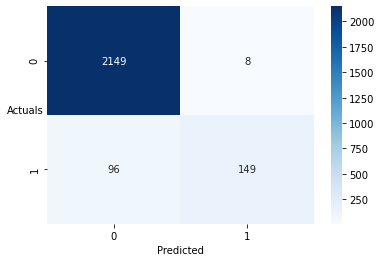

In [91]:
sns.heatmap((metrics.confusion_matrix(train_dataset['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [124]:
print(metrics.classification_report(train_dataset['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.957     0.996     0.976      2157
           1      0.949     0.608     0.741       245

    accuracy                          0.957      2402
   macro avg      0.953     0.802     0.859      2402
weighted avg      0.956     0.957     0.952      2402



* Choosing the optimal threshold

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_dataset['Default'],y_prob_pred_train)


In [98]:
tpr.shape

(123,)

In [99]:
fpr.shape

(123,)

In [106]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.21810285570994345

* Validating with revised threshold of 0.218

In [200]:
y_class_pred_train=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.218:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

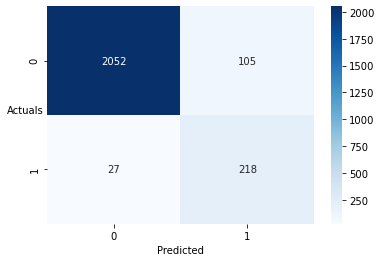

In [128]:
sns.heatmap((metrics.confusion_matrix(train_dataset['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [129]:
print(metrics.classification_report(train_dataset['Default'],y_class_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.951     0.969      2157
           1      0.675     0.890     0.768       245

    accuracy                          0.945      2402
   macro avg      0.831     0.921     0.868      2402
weighted avg      0.955     0.945     0.948      2402



#### Validating on the test set

In [130]:
y_prob_pred_test = model_8.predict(test_dataset)

In [201]:
y_class_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.218:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

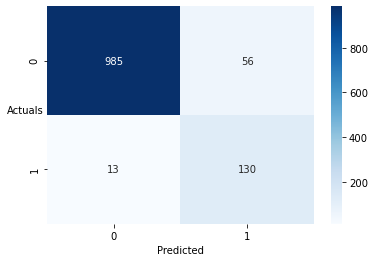

In [202]:
sns.heatmap((metrics.confusion_matrix(test_dataset['Default'],y_class_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [203]:
print(metrics.classification_report(test_dataset['Default'],y_class_pred_test,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.946     0.966      1041
           1      0.699     0.909     0.790       143

    accuracy                          0.942      1184
   macro avg      0.843     0.928     0.878      1184
weighted avg      0.952     0.942     0.945      1184



### Interpretations;
* The Recall value for train test is 0.890 and for test set is 0.909
* The Precision value for train test is 0.675 and for test set is 0.699
* Most significant features in data set are;
   * Book_Value_Adj_Unit_Curr
   * Current_Ratio_Latest
   * Debtors_Ratio_Latest
   * Interest_Cover_Ratio_Latest
   * PBDTM_perc_Latest
* All the above variables are in a negative relationship with "Default" i.e an increment in these variables may negatively affect the "Default".
* The increment in above variables may increase the Credit Risk.
* the variable "Current_Ratio_Latest" is showing to have most negative affect and thus an in crease in this will increase the Risk most significantly. 	


# FRA_Project(Milestone-2)

## 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [135]:
RF=RandomForestClassifier()

In [136]:
RF_model=RF.fit(X_train,y_train)

In [137]:
ytrain_predict=RF_model.predict(X_train)
ytest_predict=RF_model.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix,classification_report

In [139]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2157
           1       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



In [140]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.93      0.90      0.91       143

    accuracy                           0.98      1184
   macro avg       0.96      0.94      0.95      1184
weighted avg       0.98      0.98      0.98      1184



#### using grid search

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid={'max_depth':[5,7,9,11],'min_samples_leaf':[3,5,10,15],'min_samples_split':[10,15,30,45,55],'n_estimators':[5,10,15,25]}

In [143]:
grid_search=GridSearchCV(estimator=RF,param_grid=param_grid,cv=3)

In [144]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [3, 5, 10, 15],
                         'min_samples_split': [10, 15, 30, 45, 55],
                         'n_estimators': [5, 10, 15, 25]})

In [145]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=15,
                       n_estimators=10)

In [146]:
pred_train_rf = best_grid.predict(X_train)

## 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [147]:
pred_test_rf = best_grid.predict(X_test)

### Performance Matrices - Random Forest Model

#### Train Data

In [148]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2157
           1       0.95      0.89      0.92       245

    accuracy                           0.98      2402
   macro avg       0.97      0.94      0.96      2402
weighted avg       0.98      0.98      0.98      2402



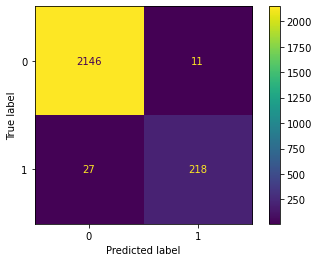

In [151]:
plot_confusion_matrix(best_grid,X_train,y_train);

#### Test Data

In [152]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.93      0.90      0.91       143

    accuracy                           0.98      1184
   macro avg       0.96      0.95      0.95      1184
weighted avg       0.98      0.98      0.98      1184



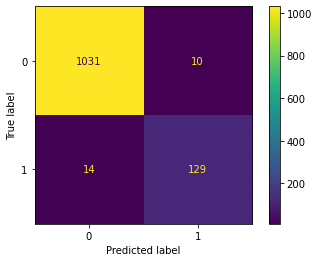

In [153]:
plot_confusion_matrix(best_grid,X_test,y_test);

## 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [155]:
LDA = LinearDiscriminantAnalysis()

In [156]:
lda_model = LDA.fit(X_train, y_train)

In [157]:
pred_train_lda = lda_model.predict(X_train)

## 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [158]:
pred_test_lda = lda_model.predict(X_test)

### Performance Matrices - LDA Model

#### Train Data

In [159]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2157
           1       0.81      0.42      0.55       245

    accuracy                           0.93      2402
   macro avg       0.87      0.70      0.76      2402
weighted avg       0.92      0.93      0.92      2402



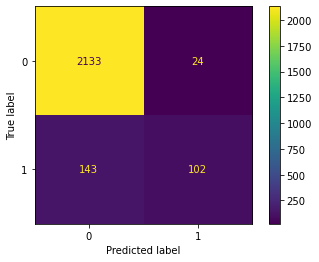

In [160]:
plot_confusion_matrix(lda_model,X_train,y_train);

#### Test Data

In [161]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1041
           1       0.78      0.38      0.51       143

    accuracy                           0.91      1184
   macro avg       0.85      0.68      0.73      1184
weighted avg       0.90      0.91      0.90      1184



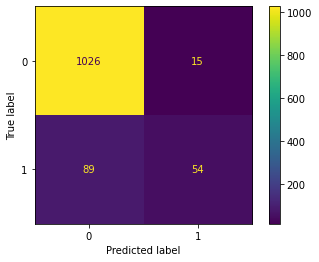

In [162]:
plot_confusion_matrix(lda_model,X_test,y_test);

### Choosing the optimal threshold

In [163]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [164]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [165]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.046408790415293624

In [166]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.046:
        a=1
    else:
        a=0
    y_class_pred.append(a)

#### Performance Matrices - LDA Model with optimum threshold

#### Train Data

In [167]:
print(metrics.classification_report(y_train, y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2157
           1       0.46      0.89      0.60       245

    accuracy                           0.88      2402
   macro avg       0.72      0.89      0.77      2402
weighted avg       0.93      0.88      0.90      2402



In [168]:
confusion_matrix(y_train,y_class_pred)

array([[1895,  262],
       [  26,  219]], dtype=int64)

plot_confusion_matrix(lda_model,X_train,y_train);

#### Test Data

In [169]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.046:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [170]:
print(metrics.classification_report(y_test, y_class_pred,digits=2))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1041
           1       0.41      0.91      0.57       143

    accuracy                           0.83      1184
   macro avg       0.70      0.87      0.73      1184
weighted avg       0.92      0.83      0.86      1184



In [171]:
confusion_matrix(y_test,y_class_pred)

array([[856, 185],
       [ 13, 130]], dtype=int64)

plot_confusion_matrix(lda_model,X_train,y_train);

## 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

### AUC and ROC for Logistics Model

#### Train

Area under Curve is 0.9596226807830225


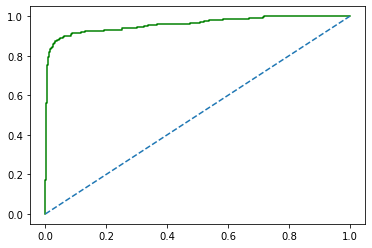

In [172]:
LM_train_fpr, LM_train_tpr, LM_thresholds = roc_curve(train_dataset['Default'],y_prob_pred_train)
LM_train_auc=roc_auc_score(train_dataset['Default'],y_prob_pred_train)
plt.plot(LM_train_fpr,LM_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
print('Area under Curve is', LM_train_auc)

#### Test

Area under Curve is 0.9640877854134338


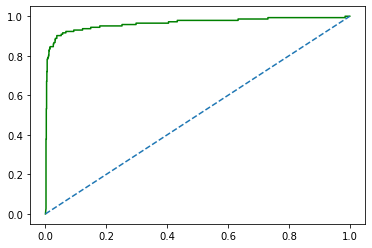

In [173]:
LM_test_fpr, LM_test_tpr, LM_thresholds = roc_curve(test_dataset['Default'],y_prob_pred_test)
LM_test_auc=roc_auc_score(test_dataset['Default'],y_prob_pred_test)
plt.plot(LM_test_fpr,LM_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
print('Area under Curve is', LM_test_auc)

### AUC and ROC for Random Forest Model

#### Train

Area under Curve is 0.9981569261918953


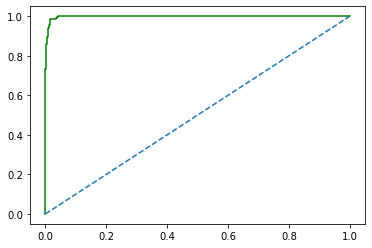

In [174]:
RF_train_fpr, RF_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(RF_train_fpr,RF_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
RF_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', RF_train_auc)

#### Test

Area under Curve is 0.9868402490880875


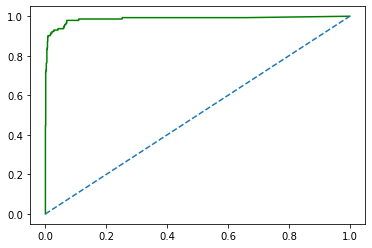

In [175]:
RF_test_fpr, RF_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(RF_test_fpr,RF_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
RF_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', RF_test_auc)

### AUC and ROC for LDA Model

#### Train

Area under Curve is 0.944062520696735


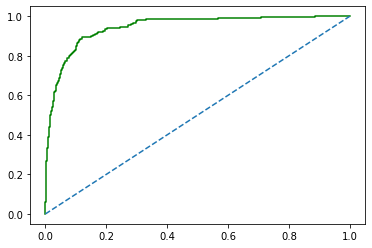

In [176]:
LDA_train_fpr, LDA_train_tpr,_=roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.plot(LDA_train_fpr,LDA_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
LDA_train_auc=roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1])
print('Area under Curve is', LDA_train_auc)

#### Test

Area under Curve is 0.9313261186460035


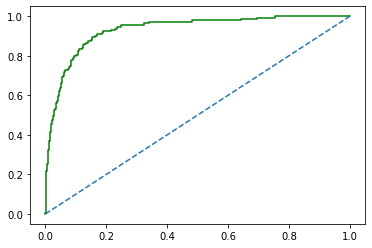

In [177]:
LDA_test_fpr, LDA_test_tpr,_=roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.plot(LDA_test_fpr,LDA_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
LDA_test_auc=roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1])
print('Area under Curve is', LDA_test_auc)

### Head to Head Model Comparision

In [204]:
Logit_model_train=classification_report(train_dataset['Default'],y_class_pred_train,output_dict=True)
df1=pd.DataFrame(Logit_model_train).transpose()
Logit_model_train_precision=round(df1.loc["1"][0],2)
Logit_model_train_recall=round(df1.loc["1"][1],2)
Logit_model_train_accuracy=round(df1.loc["accuracy"][0],2)

Logit_model_test=classification_report(test_dataset['Default'],y_class_pred_test,output_dict=True)
df2=pd.DataFrame(Logit_model_test).transpose()
Logit_model_test_precision=round(df2.loc["1"][0],2)
Logit_model_test_recall=round(df2.loc["1"][1],2)
Logit_model_test_accuracy=round(df2.loc["accuracy"][0],2)

RF_model_train=classification_report(y_train, pred_train_rf,output_dict=True)
df3=pd.DataFrame(RF_model_train).transpose()
RF_model_train_precision=round(df3.loc["1"][0],2)
RF_model_train_recall=round(df3.loc["1"][1],2)
RF_model_train_accuracy=round(df3.loc["accuracy"][0],2)

RF_model_test=classification_report(y_test, pred_test_rf,output_dict=True)
df4=pd.DataFrame(RF_model_test).transpose()
RF_model_test_precision=round(df4.loc["1"][0],2)
RF_model_test_recall=round(df4.loc["1"][1],2)
RF_model_test_accuracy=round(df4.loc["accuracy"][0],2)

LDA_model_train=classification_report(y_train, pred_train_lda,output_dict=True)
df5=pd.DataFrame(LDA_model_train).transpose()
LDA_model_train_precision=round(df5.loc["1"][0],2)
LDA_model_train_recall=round(df5.loc["1"][1],2)
LDA_model_train_accuracy=round(df5.loc["accuracy"][0],2)

LDA_model_test=classification_report(y_test, pred_test_lda,output_dict=True)
df6=pd.DataFrame(LDA_model_test).transpose()
LDA_model_test_precision=round(df6.loc["1"][0],2)
LDA_model_test_recall=round(df6.loc["1"][1],2)
LDA_model_test_accuracy=round(df6.loc["accuracy"][0],2)

In [205]:
index=['Precision','Recall','Accuracy','AUC']
data = pd.DataFrame({'Logit_model_train':[Logit_model_train_precision,Logit_model_train_recall,Logit_model_train_accuracy,LM_train_auc],
        'Logit_model_test':[Logit_model_test_precision,Logit_model_test_recall,Logit_model_test_accuracy,LM_test_auc],
       'RF_model_train':[RF_model_train_precision,RF_model_train_recall,RF_model_train_accuracy,RF_train_auc],
        'RF_model_test':[RF_model_test_precision,RF_model_test_recall,RF_model_test_accuracy,RF_test_auc],
       'LDA_model_train':[LDA_model_train_precision,LDA_model_train_recall,LDA_model_train_accuracy,LDA_train_auc],
        'LDA_model_test':[LDA_model_test_precision,LDA_model_test_recall,LDA_model_test_accuracy,LDA_test_auc]},index=index )
round(data,2)

,Logit_model_train,Logit_model_test,RF_model_train,RF_model_test,LDA_model_train,LDA_model_test
Precision,0.67,0.70,0.95,0.93,0.81,0.78
Recall,0.89,0.91,0.89,0.90,0.42,0.38
Accuracy,0.95,0.94,0.98,0.98,0.93,0.91
AUC,0.96,0.96,1.00,0.99,0.94,0.93


#### From above table it is clear that ;
* Best Precision for class '1' (i.e for default) is given by Random Forest model
* Best Recall for class '1' (i.e for default) is given by Logistic Regression model
* Best accuracy is given by Random Forest model
* Best AUC for train data is given by Random Forest model
* Best AUC for test data is given by Logistic Regression model

#### Since, the Recall is more important measure for our model ( predicting the defaulters), so  Logistic Regression model is suggested for this problem.

## 1.13 State Recommendations from the above models

### Best 10 features of Random Forest Model

In [206]:
importance=pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns)
importance.sort_values(by='Imp',ascending=False).head(10)

,Imp
Book_Value_Unit_Curr,0.353573
Networth,0.320431
Book_Value_Adj_Unit_Curr,0.073209
ROG_Net_Worth_perc,0.026742
PBDT,0.023714
PBDTM_perc_Latest,0.022299
CP,0.021406
PBITM_perc_Latest,0.018135
Capital_Employed,0.017135
Total_Asset_Turnover_Ratio_Latest,0.014666


### Best features of Logistic Regression Model

*Book_Value_Adj_Unit_Curr
*Current_Ratio_Latest
*Debtors_Ratio_Latest
*Interest_Cover_Ratio_Latest
*PBDTM_perc_Latest

### Recommendations:



# Market Risk


# Problem Statement

## The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mlab
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [31]:
df=pd.read_csv('Market+Risk+Dataset.csv')

In [7]:
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [32]:
df.columns=df.columns.str.replace(' ','_')

In [33]:
df.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


* The datatype of column 'date' is object type, which is required to be changed to 'Datetime' datatype

In [35]:
df1=pd.read_csv('Market+Risk+Dataset.csv',parse_dates=['Date'])

In [36]:
df1.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243


In [37]:
df['Date']=[pd.to_datetime(d) for d in df['Date']]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    datetime64[ns]
 1   Infosys              314 non-null    int64         
 2   Indian Hotel         314 non-null    int64         
 3   Mahindra & Mahindra  314 non-null    int64         
 4   Axis Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree Cement         314 non-null    int64         
 7   Sun Pharma           314 non-null    int64         
 8   Jindal Steel         314 non-null    int64         
 9   Idea Vodafone        314 non-null    int64         
 10  Jet Airways          314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


## 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

In [27]:
df.Date.tail(50)

264   2019-04-22
265   2019-04-29
266   2019-06-05
267   2019-05-13
268   2019-05-20
269   2019-05-27
270   2019-03-06
271   2019-10-06
272   2019-06-17
273   2019-06-24
274   2019-01-07
275   2019-08-07
276   2019-07-15
277   2019-07-22
278   2019-07-29
279   2019-05-08
280   2019-12-08
281   2019-08-19
282   2019-08-26
283   2019-02-09
284   2019-09-09
285   2019-09-16
286   2019-09-23
287   2019-09-30
288   2019-07-10
289   2019-10-14
290   2019-10-21
291   2019-10-28
292   2019-04-11
293   2019-11-11
294   2019-11-18
295   2019-11-25
296   2019-02-12
297   2019-09-12
298   2019-12-16
299   2019-12-23
300   2019-12-30
301   2020-06-01
302   2020-01-13
303   2020-01-20
304   2020-01-27
305   2020-03-02
306   2020-10-02
307   2020-02-17
308   2020-02-24
309   2020-02-03
310   2020-09-03
311   2020-03-16
312   2020-03-23
313   2020-03-30
Name: Date, dtype: datetime64[ns]

In [29]:
df1=df.sort_values(by='Date')

Text(0.5, 1.0, 'Infosys Stock Price 2014-03-31 - 2020-03-30')

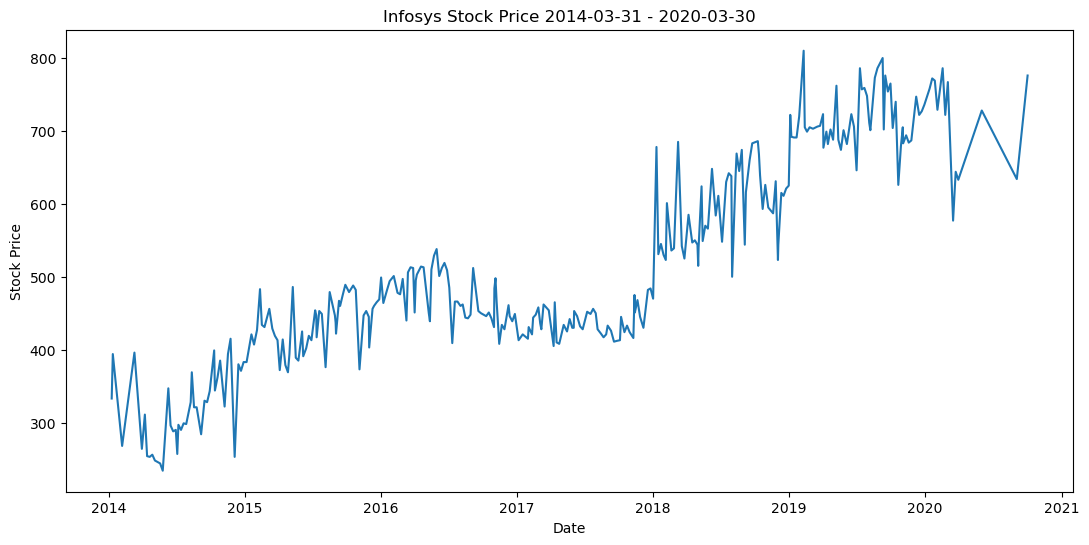

In [30]:
plt.figure(figsize=(13,6))
#plt.scatter(df['Date'], df['Mahindra_&_Mahindra'])
plt.plot(df1['Date'], df1['Infosys'])
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Infosys Stock Price 2014-03-31 - 2020-03-30")

Text(0.5, 1.0, 'SAIL Stock Price  2014-03-31 - 2020-03-30')

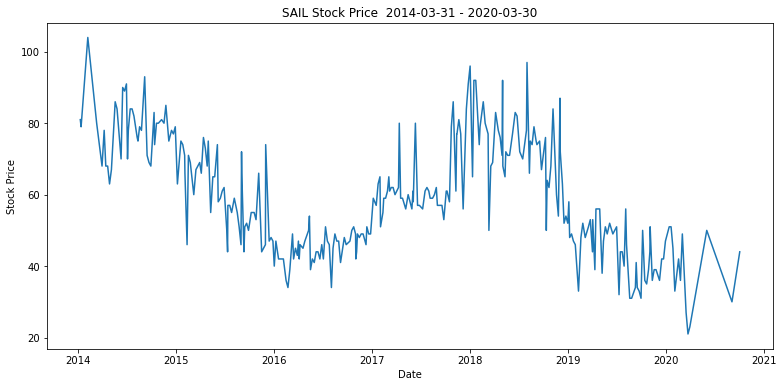

In [217]:
plt.figure(figsize=(13,6))
#plt.scatter(df['Date'], df['Mahindra_&_Mahindra'])
plt.plot(df1['Date'], df1['SAIL'])
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("SAIL Stock Price  2014-03-31 - 2020-03-30")

### Infrences;
* Stock price graph of Infosys;
   * Stock price graph of Infosys shows an overall increase in stock prices with time from 2014-03-31 to 2020-03-30.
   * There is an increase in stock prices till mid 2016 and the stock prices decreased till 2017 year end.
   * The stock prices are generally increasing after 2018 year start.

* Stock price graph of SAIL;
   * Stock price graph of SAIL shows an overall decrease in stock prices with time from 2014-03-31 to 2020-03-30.
   * There is steep decrease in stock prices till first quarter of 2016 and then prices increased till last quarter of 2018.
   * The stock prices are generally decreasing after 2018 last quarter of year start.

## 2.2 Calculate Returns for all stocks with inference

In [218]:
df1_returns = np.log(df.drop(['Date'],axis=1)).diff(axis = 0, periods = 1) 
df1_returns

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


* Inferences

## 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

###  Stock means

In [219]:
stock_means = df1_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

### Stock standard deviation

In [220]:
stock_std = df1_returns.std(axis = 0)
stock_std

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

* Inferences

## 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

In [221]:
df2 = pd.DataFrame({'Average':stock_means, 'Volatility': stock_std})
df2

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


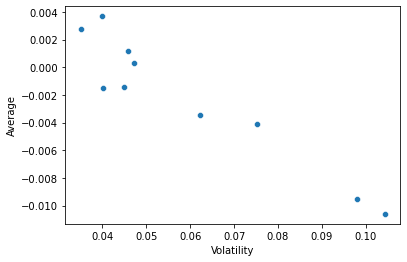

In [222]:
plot = sns.scatterplot(df2['Volatility'], df2['Average'])
plt.show()

* Inferences

## 2.5 Conclusion and Recommendations

### Stocks sorted by Volatility

In [223]:
df2.sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Mahindra_&_Mahindra,-0.001506,0.040169
Sun_Pharma,-0.001455,0.045033
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315


### Stocks sorted by Average return

In [224]:
df2.sort_values(by = 'Average')

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
Jindal_Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Mahindra_&_Mahindra,-0.001506,0.040169
Sun_Pharma,-0.001455,0.045033
Indian_Hotel,0.000266,0.047131
Axis_Bank,0.001167,0.045828
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917


### Getting the stocks with relatively higher mean and low standard deviation(Volatility)

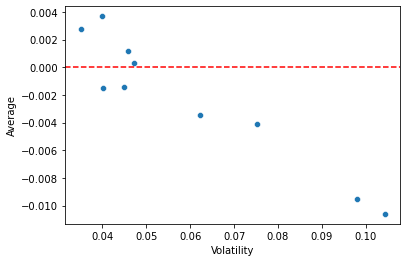

In [225]:
plot = sns.scatterplot(df2['Volatility'], df2['Average'])
plot.axhline(y=0.0,linestyle='--', color = "red")
plt.show()

In [226]:
df2[df2['Average'] > 0].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131


#### Conclusion and Recommendations;
* From above graph and tables;
   
   * The lowest volatility is for Infosys and highest for Idea_Vodafone.
   * The lowest average return is for Idea_Vodafone and highest for Shree_Cement.
   * There are only four stocks with non negative average value of stocks and less volatility, namely,Infosys, Shree_Cement,         Axis_Bank and Indian_Hotel.
* Hence, from above analysis; the worst stock to be invested seems like that of Idea_Vodafone and the best seems to be that of Infosys. If  somewhat higher risk is acceptable, than the stocks of Indian_Hotel	 will provide better returns.

# Thanks............